In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings("ignore")

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
# Pad the sequences
max_length = 200
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)
# Print shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
X_train shape: (25000, 200)
X_test shape: (25000, 200)


In [6]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 253s 644ms/step - accuracy: 0.6919 - loss: 0.5653 - val_accuracy: 0.8440 - val_loss: 0.3758
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 413s 1s/step - accuracy: 0.8289 - loss: 0.3997 - val_accuracy: 0.8455 - val_loss: 0.3695
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 239s 612ms/step - accuracy: 0.8864 - loss: 0.2916 - val_accuracy: 0.8586 - val_loss: 0.3397


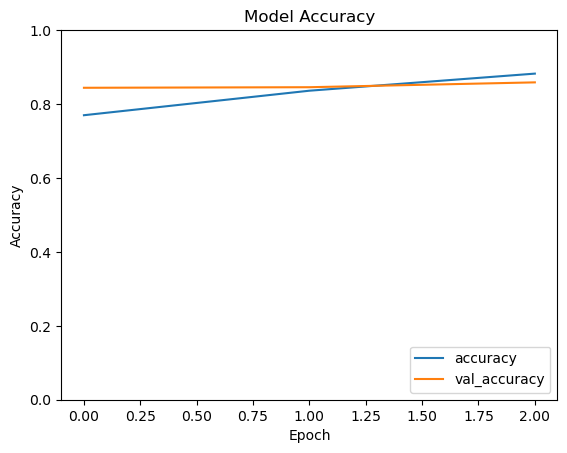

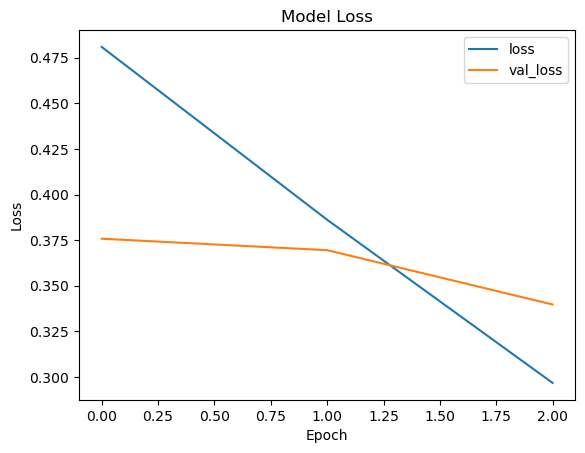

In [10]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

782/782 - 92s - 118ms/step - accuracy: 0.8586 - loss: 0.3397
Test accuracy: 0.8586400151252747
